# 中国大陆地区的读者请注意！
# 本章也换成了使用国内厂商的接口来获取数据

In [1]:
#首先导入鸢尾花数据载入工具
from sklearn.datasets import load_iris
#导入KNN分类模型
from sklearn.neighbors import KNeighborsClassifier
#为了方便可视化，我们再导入matplotlib和seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#加载鸢尾花数据集，赋值给iris变量
iris = load_iris()
#查看数据集的键名
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
#查看数据集的特征名称
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#查看数据集中的样本分类
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
#将样本的特征和标签分别赋值给X和y
X, y = iris.data, iris.target
#查看是否成功
X.shape

(150, 4)

In [6]:
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#将X和y拆分为训练集与验证集
X_train, X_test, y_train, y_test =\
train_test_split(X, y)
#查看拆分情况
X_train.shape

(112, 4)

In [7]:
#创建knn分类器,参数保持默认
knn_clf = KNeighborsClassifier()
#使用训练集拟合模型
knn_clf.fit(X_train, y_train)
#查看模型在训练集和验证集中的准确率
print('训练集准确率：%.2f'%knn_clf.score(X_train, y_train))
print('验证集准确率：%.2f'%knn_clf.score(X_test, y_test))

训练集准确率：0.97
验证集准确率：0.97


In [8]:
knn_clf

KNeighborsClassifier()

In [9]:
#导入网格搜索
from sklearn.model_selection import GridSearchCV
#定义一个从1到10的n_neighbors
n_neighbors = tuple(range(1,11,1))
#创建网格搜索实例，estimator用KNN分类器
#把刚刚定义的n_neighbors传入给param_grid参数
#cv参数指交叉验证次数为5
cv = GridSearchCV(estimator=KNeighborsClassifier(),
                 param_grid = {'n_neighbors':n_neighbors},
                 cv = 5)
#使用网格搜索拟合数据集
cv.fit(X,y)
#查看最优参数
cv.best_params_

{'n_neighbors': 6}

In [10]:
n_neighbors

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

In [11]:
#创建knn分类器,n_neighbors设置为6
knn_clf = KNeighborsClassifier(n_neighbors=6)
#使用模型拟合训练集数据
knn_clf.fit(X_train, y_train)
#查看模型在训练集和验证集中的准确率
print('训练集准确率：%.2f'%knn_clf.score(X_train, y_train))
print('验证集准确率：%.2f'%knn_clf.score(X_test, y_test))

训练集准确率：0.97
验证集准确率：0.97


In [12]:
#载入波士顿房价数据集导入工具
from sklearn.datasets import load_boston
#将数据导入
boston = load_boston()
#查看数据集的键名
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
#查看样本的特征名称
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
#选取前十套房屋，查看售价
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [15]:
#将样本特征和售价赋值给X，y
X, y = boston.data, boston.target
#使用train_test_split拆分为训练集和验证集
X_train, X_test, y_train, y_test =\
train_test_split(X, y)
#查看拆分的结果
X_train.shape

(379, 13)

In [16]:
#导入KNN回归算法
from sklearn.neighbors import KNeighborsRegressor
#创建一个实例，参数保持默认
knn_reg = KNeighborsRegressor()
#拟合训练集数据
knn_reg.fit(X_train, y_train)
#查看模型在训练集和验证集的性能表现
print('训练集准确率：%.2f'%knn_reg.score(X_train, y_train))
print('验证集准确率：%.2f'%knn_reg.score(X_test, y_test))

训练集准确率：0.70
验证集准确率：0.40


In [17]:
#这次让n_neighbors参数从1到20遍历
n_neighbors = tuple(range(1,21,1))
#创建KNN回归的网格搜索实例
cv_reg = GridSearchCV(estimator = KNeighborsRegressor(),
                     param_grid = {'n_neighbors':n_neighbors},
                     cv = 5)
#用网格搜索拟合数据集
cv_reg.fit(X, y)
#返回最佳参数
cv_reg.best_params_

{'n_neighbors': 10}

In [18]:
#查看最佳参数对应的最佳模型R平方分数
cv.best_score_

0.9800000000000001

# 3.3.1 基于机器学习的简单交易策略

In [19]:
#导入Pandas
import pandas as pd
#导入金融数据获取模块datareader
import tushare as ts
#导入numpy，一会儿会用到
import numpy as np

In [40]:
#首先我们来定义一个函数，用来获取数据
#传入的三个参数分别是开始日期，结束日期和输出的文件名
def load_stock(start_date, end_date, output_file):
    #首先让程序尝试读取已下载并保存的文件
    try:
        df = pd.read_pickle(output_file)
        #如果文件已存在，则打印载入股票数据文件完毕
        print('载入股票数据文件完毕')
    #如果没有找到文件，则重新进行下载
    except FileNotFoundError:
        print('文件未找到，重新下载中')
        #这里制定下载中国平安（601318）的交易数据
        #下载源为yahoo
        df = ts.get_k_data('601318', start_date, end_date)
        df = df.set_index('date')
        #下载成功后保存为pickle文件
        df.to_pickle(output_file)
        #并通知我们下载完成
        print('下载完成')
    #最后将下载的数据表进行返回
    return df

In [42]:
#下面使用我们定义好的函数来获取中国平安的交易数据
#获取三年的数据，从2017年3月9日至2020年的3月5日
#保存为名为601318的pickle文件
zgpa = load_stock(start_date = '2017-03-09', 
                  end_date = '2020-03-05',
                 output_file = '601318.pkl')

文件未找到，重新下载中
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
下载完成


In [43]:
#查看一下数据的前五行
zgpa.head()

,open,close,high,low,volume,code
date,,,,,,
2017-03-09,26.692,26.702,26.722,26.422,377966.0,601318
2017-03-10,26.632,26.522,26.692,26.502,207446.0,601318
2017-03-13,26.522,26.892,26.962,26.482,359990.0,601318
2017-03-14,26.912,26.862,27.052,26.732,276964.0,601318
2017-03-15,26.802,26.882,26.922,26.682,268720.0,601318


In [44]:
#下面我们来定义一个用于分类的函数，给数据表增加三个字段
#首先是开盘价减收盘价，命名为‘Open-Close’
#其次是最高价减最低价，命名为‘High-Low’
def classification_tc(df):
    df['Open-Close'] = df['open'] - df['close']
    df['High-Low'] = df['high'] - df['low']
    #在添加一个target字段，如果次日收盘价高于当日收盘价，则标记为1，反之为-1
    df['target'] = np.where(df['close'].shift(-1)>df['close'], 1, -1)
    #去掉有空值的行
    df = df.dropna()
    #将‘Open-Close’和‘High-Low’作为数据集的特征
    X = df[['Open-Close', 'High-Low']]
    #将target赋值给y
    y = df['target']
    #将处理好的数据表以及X与y进行返回
    return(df,X,y)

In [45]:
#下面定义一个用于回归的函数
#特征的添加和分类函数类似
#只不过target字段改为次日收盘价减去当日收盘价
def regression_tc(df):
    df['Open-Close'] = df['open'] - df['close']
    df['High-Low'] = df['high'] - df['low']
    df['target'] = df['close'].shift(-1) - df['close']
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    y = df['target']
    #将处理好的数据表以及X与y进行返回
    return(df,X,y)

In [105]:
#使用classification_tc函数生成数据集的特征与目标
df, X, y = classification_tc(zgpa)
#将数据集拆分为训练集与验证集
X_train, X_test, y_train, y_test =\
train_test_split(X, y, shuffle=False,train_size=0.8)

In [106]:
df.head()

,open,close,high,low,volume,code,Open-Close,High-Low,target
date,,,,,,,,,
2017-03-09,26.692,26.702,26.722,26.422,377966.0,601318,-0.01,0.30,-1
2017-03-10,26.632,26.522,26.692,26.502,207446.0,601318,0.11,0.19,1
2017-03-13,26.522,26.892,26.962,26.482,359990.0,601318,-0.37,0.48,-1
2017-03-14,26.912,26.862,27.052,26.732,276964.0,601318,0.05,0.32,1
2017-03-15,26.802,26.882,26.922,26.682,268720.0,601318,-0.08,0.24,1


In [107]:
#创建一个knn实例，n_neighbors取95
knn_clf = KNeighborsClassifier(n_neighbors=95)
#使用knn拟合训练集
knn_clf.fit(X_train, y_train)
#打印模型在训练集中的准确率
print(knn_clf.score(X_train, y_train))
#打印模型在验证集中的准确率
print(knn_clf.score(X_test, y_test))

0.5643224699828473
0.4863013698630137


In [108]:
#使用KNN模型预测每日股票的涨跌，保存为‘Predict_Signal’
df['Predict_Signal'] = knn_clf.predict(X)
#在数据集中添加一个字段，用当日收盘价除以前一日收盘价，并取其自然对数
df['Return'] = np.log(df['close']/df['close'].shift(1))
#查看一下
df.head()

,open,close,high,low,volume,code,Open-Close,High-Low,target,Predict_Signal,Return
date,,,,,,,,,,,
2017-03-09,26.692,26.702,26.722,26.422,377966.0,601318,-0.01,0.30,-1,1,NaN
2017-03-10,26.632,26.522,26.692,26.502,207446.0,601318,0.11,0.19,1,1,-0.006764
2017-03-13,26.522,26.892,26.962,26.482,359990.0,601318,-0.37,0.48,-1,1,0.013854
2017-03-14,26.912,26.862,27.052,26.732,276964.0,601318,0.05,0.32,1,1,-0.001116
2017-03-15,26.802,26.882,26.922,26.682,268720.0,601318,-0.08,0.24,1,1,0.000744


In [109]:
#定义一个计算累计回报的函数
def cum_return(df, split_value):
    #该股票基准收益为‘Return’的总和*100
    cum_return = df[split_value:]['Return'].cumsum()*100
    #将计算结果进行返回
    return cum_return

In [110]:
#再定义一个计算使用策略交易的收益
def strategy_return(df, split_value):
    #使用策略交易的收益为模型‘zgpa_Return’乘以模型预测的涨跌幅
    df['Strategy_Return'] = df['Return']*df['Predict_Signal'].shift(1)
    #将每日策略交易的收益加和并乘以100
    cum_strategy_return = df[split_value:]['Strategy_Return'].cumsum()*100
    #将计算结果进行返回
    return cum_strategy_return

In [111]:
#定义一个绘图函数，用来对比基准收益和算法交易的收益
def plot_chart(cum_return, cum_strategy_return, symbol):
    #首先是定义画布的尺寸
    plt.figure(figsize=(9,6))
    #使用折线图绘制基准收益
    plt.plot(cum_return, '--',label='%s Returns'%symbol)
    #使用折线图绘制算法交易收益
    plt.plot(cum_strategy_return, label = 'Strategy Returns')
    #添加图注
    plt.legend()
    plt.xticks([0,36,72,108,145])
    #显示图像
    plt.show()

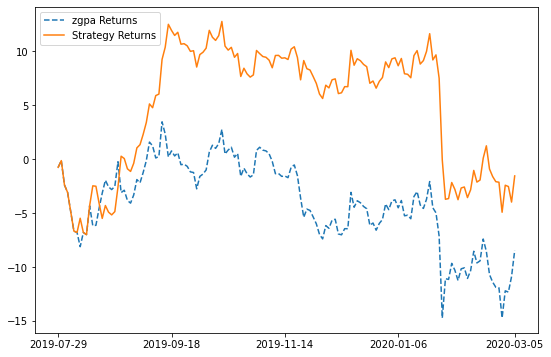

In [112]:
#首先来计算基准收益（预测集）
cum_return = cum_return(df, split_value=len(X_train))
#然后是计算使用算法交易带来的收益（同样只计算预测集）
cum_strategy_return = strategy_return(df, 
                                      split_value=len(X_train))
#用图像来进行对比
plot_chart(cum_return, cum_strategy_return, 'zgpa')